In [1]:
# menghubungkan colab ke gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# memanggil data set lewat gdrive
path = "/content/drive/MyDrive/ML_praktikum/praktikum03"

baca file csv

In [21]:
# membaca file csv menggunakan pandas
import pandas as pd

df = pd.read_csv(path + '/data/socr.csv')
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [4]:
# cari info umum pada data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [5]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


konversi data menjadi satuan Cm dan Kg

In [6]:
df1 = (
    df[["Height(Inches)", "Weight(Pounds)"]]
    .rename(columns={"Height(Inches)": "tinggi_cm",
                     "Weight(Pounds)": "berat_kg"})
    .assign(
        tinggi_cm=lambda x: x.tinggi_cm * 2.54,
            berat_kg=lambda x: x.berat_kg * 0.453592
    )
    .round({"tinggi_cm": 2, "berat_kg": 2})
).copy()

df1.head()

,tinggi_cm,berat_kg
0,167.09,51.25
1,181.65,61.91
2,176.27,69.41
3,173.27,64.56
4,172.18,65.45


split data training 80% dan data testing 20%

In [7]:
from sklearn.model_selection import train_test_split

#variabel independent/bebas
X = df1[['tinggi_cm']]
#variabel dependent/terikat/target
y = df1[['berat_kg']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7)

#cetak data training X
X_train.head()

,tinggi_cm
3253,167.14
18789,178.49
4466,169.75
19269,181.97
6527,177.60


pemodelan data : dengan data training

In [8]:
from sklearn.linear_model import LinearRegression

# buat object model instan dari class LinearRegression
model = LinearRegression()
# lakukan proses training
model.fit(X_train, y_train) #fit = method/fungsi, argument = Xtrain, y_train

LinearRegression()

evaluasi model

In [ ]:
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# prediksi model dg data testing
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

df_resume = pd.DataFrame()

# bungkus nilai tunggal jadi list biar bisa dimasukkan ke DataFrame
df_resume['R2'] = [r2]
df_resume['Koefisien (Kg/cm)'] = [model.coef_[0]]
df_resume['Intersep (Kg)'] = [model.intercept_[0]]

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# urutan dan isinya diperbaiki
df_resume['MSE'] = [mse]
df_resume['RMSE'] = [rmse]
df_resume['MAE'] = [mean_absolute_error(y_test, y_pred)]

df_resume


,R2,Koefisien (Kg/cm),Intersep (Kg),MSE,RMSE,MAE
0,0.249892,[0.5518217971118468],-37.656882,21.242936,4.609006,3.670411


# cetak persamaan regresi

In [10]:
slope = model.coef_[0][0]
intercept = model.intercept_[0]

print(f"Persamaan: y = {slope:.3f}x + {intercept:.3f}")

Persamaan: y = 0.552x + -37.657


plot regresi

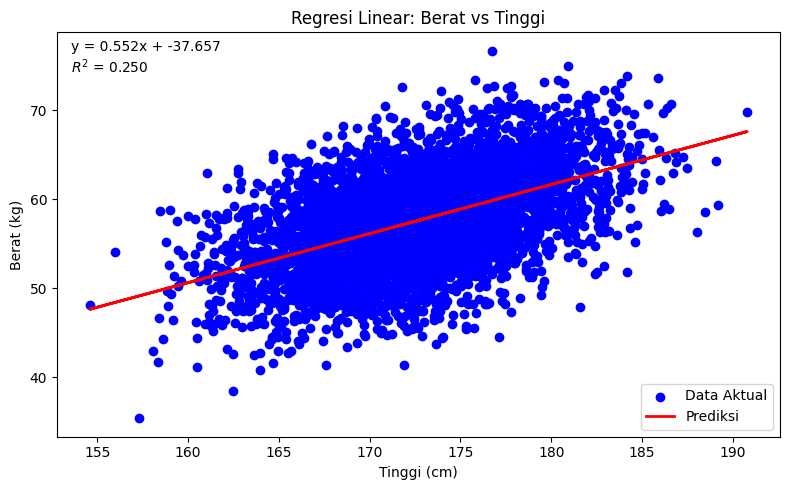

In [13]:
import matplotlib.pyplot as plt

# plot data scatter
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Data Aktual')
# garis regresi
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Prediksi")
plt.xlabel("Tinggi (cm)")
plt.ylabel("Berat (kg)")
plt.title("Regresi Linear: Berat vs Tinggi")
plt.text(
    0.02, 0.98,
    f"y = {slope:.3f}x + {intercept:.3f}\n$R^2$ = {r2:.3f}",
    transform=plt.gca().transAxes, va="top"
)

plt.legend()
plt.tight_layout()
plt.show()

data testing dari mahasiswa TI 2022

In [16]:
data = pd.read_csv(path + '/data/berat_TI2022.csv', sep=';')
df_ti2022 = pd.DataFrame(data)
df_ti2022

,No,Nama,tinggi_cm,actual_berat_kg
0,1,Rafa,168,58.5
1,2,Tiara,162,78.2
2,3,Tia,155,52.7
3,4,Keyla,160,70.3
4,5,Bani,183,65.8


In [17]:
# ambil data testing
X_testing = df_ti2022['tinggi_cm']
X_testing

,tinggi_cm
0,168
1,162
2,155
3,160
4,183


In [18]:
data = pd.read_csv(path + '/data/berat_TI2022.csv', sep=';')

y_pred = model.predict(data[['tinggi_cm']])
data['prediksi_kg'] = y_pred
data["Selisih error (kg)"] = data["actual_berat_kg"] - data["prediksi_kg"]
denom = data["actual_berat_kg"].replace(0, np.nan)
data["Akurasi (%)"] = (1 - (data["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100
data

,No,Nama,tinggi_cm,actual_berat_kg,prediksi_kg,Selisih error (kg),Akurasi (%)
0,1,Rafa,168,58.5,55.049180,3.450820,94.101162
1,2,Tiara,162,78.2,51.738249,26.461751,66.161443
2,3,Tia,155,52.7,47.875496,4.824504,90.845344
3,4,Keyla,160,70.3,50.634605,19.665395,72.026465
4,5,Bani,183,65.8,63.326507,2.473493,96.240891


In [19]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


plo regresi